#### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

####  1 Data

#### The data given in the question is stored as a dataframe and bias term is added

In [2]:
x = [1,2,3,4] #given x
bias = [1,1,1,1] #bias term
y = [3,2,0,5] #given y

In [3]:
data = pd.DataFrame(data= {'x':x,'y':y}) # convert x,y,bias to dataframe

In [4]:
data.to_csv('1data.csv',index=False) #save the dataframe containing x,y for latex report

In [5]:
df = pd.DataFrame(data= {'y':y,'b':bias,'x':x}) #actual dataframe to be used

#### For each of the basis function, the variable x has been raised to its power. For example for k=3 the basis functions will be {1,x,$x^{2}$} and likewise.

In [6]:
df['x_2'] = df['x']**2 #creating x power 2 and saving it in dataframe
df['x_3'] = df['x']**3 #creating x power 3 and saving it in dataframe

#### The function below is used to calculate the weights which returns weights rounded to 2 decimal places

In [7]:
def weight_calulator(dataframe , col_start,col_end,dependent) : #inputs are dataframe , column to start and to end
    X = np.array(dataframe.loc[:, col_start:col_end].values) # slice the dataframe and convert to numpy array
    Y = np.array(dataframe.loc[:, dependent].values) #get value of dependent variable and save in Y variable
    weight = np.matmul(np.linalg.inv(np.matmul(X.transpose() , X)) , np.matmul(X.transpose() , Y)) #calculate weights using standard inverse method using least squares
    return list(np.round(weight, 2)) # return weights to 2 decimal places

#### 1a

#### For each value of k , weights have been calculated and its corresponding equations have been mentioned.

#### k=1

In [8]:
deg_0 = weight_calulator(df,'b','b','y')
deg_0

[2.5]

$$
  y = 2.5
$$


#### k=2

In [9]:
deg_1 =weight_calulator(df,'b','x','y')
deg_1

[1.5, 0.4]

$$
  y = 1.5 + 0.4 x
$$


#### k=3

In [10]:
deg_2 =weight_calulator(df,'b','x_2','y')
deg_2

[9.0, -7.1, 1.5]

$$
  y = 9 - 7.1 x + 1.5 x^2
$$

#### k=4

In [11]:
deg_3 =weight_calulator(df,'b','x_3','y')
deg_3

[-5.0, 15.17, -8.5, 1.33]

$$
  y = -5 + 15.17 x - 8.5 x^2 + 1.33 x^3
$$

In [12]:
x1 = list(np.arange(0,8,0.01)) #create new x variable to use trained model
y0 = list(deg_0)*len(x1) 
df_calc = pd.DataFrame({'x':x1,'y0':y0})
 
df_calc['y1'] = deg_1[0] + deg_1[1]*df_calc['x'] #predict y for k=2
df_calc['y2'] = deg_2[0] + deg_2[1]*df_calc['x'] + deg_2[2]*(df_calc['x']**2) #predict y for k=3
df_calc['y3'] = deg_3[0] + deg_3[1]*df_calc['x'] + deg_3[2]*(df_calc['x']**2) + deg_3[3]*(df_calc['x']**3) #predict y for k=4

#### 1b

#### The plot below is the required graph of question 1b.

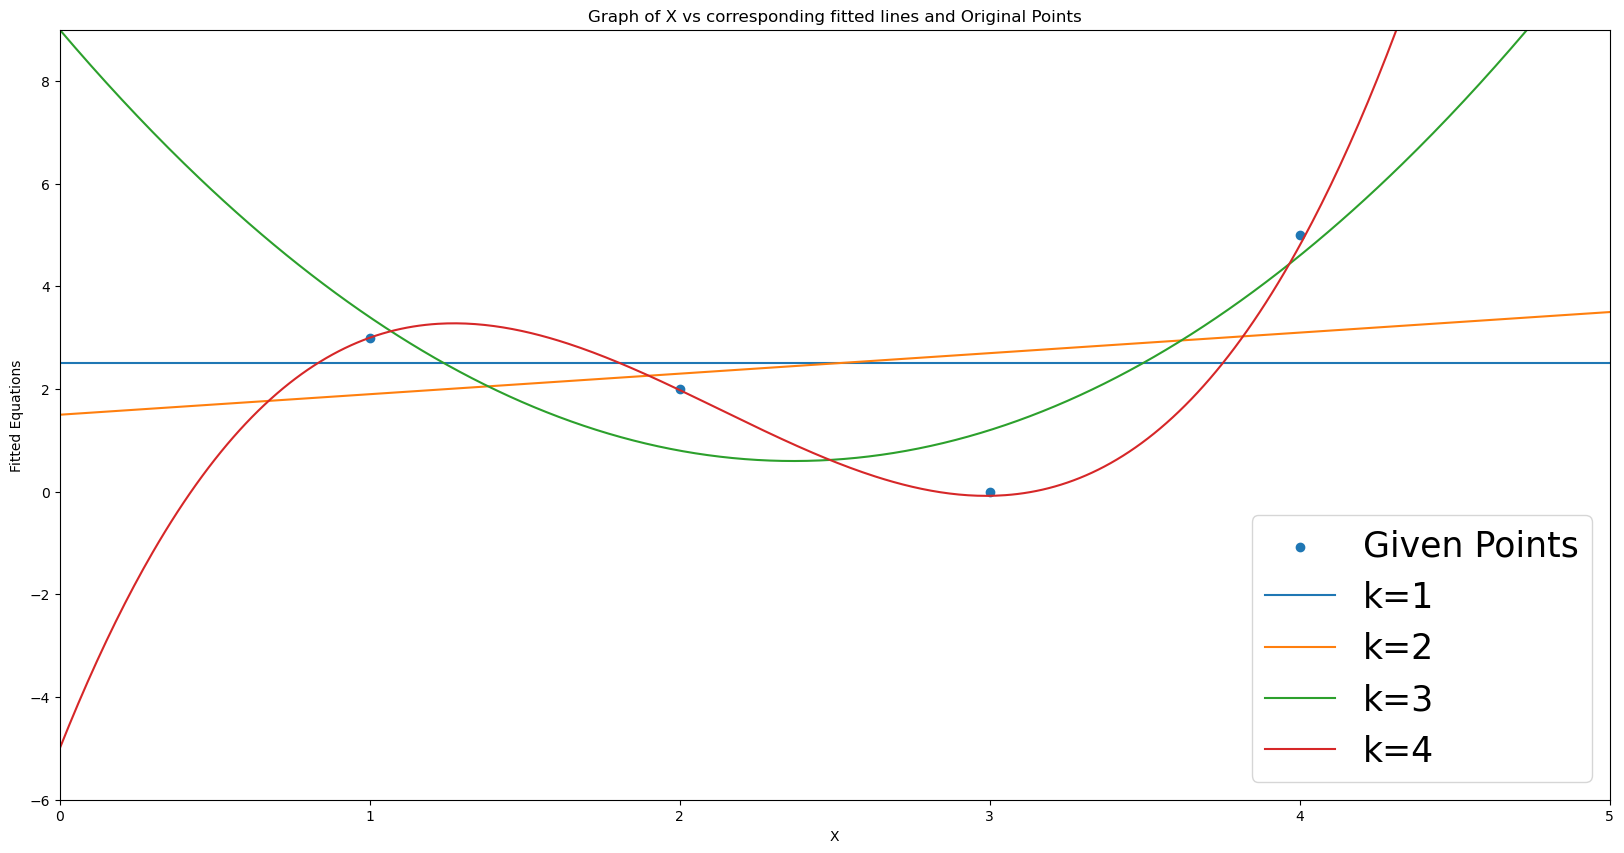

In [13]:
f, ax = plt.subplots(figsize=(20, 10))
ax.set_xlim(xmin=0,xmax=5)
ax.set_ylim(ymin=-6,ymax=9)

plt.scatter(df['x'],df['y'])
plt.plot(df_calc['x'],df_calc['y0'])
plt.plot(df_calc['x'],df_calc['y1'])
plt.plot(df_calc['x'],df_calc['y2'])
plt.plot(df_calc['x'],df_calc['y3'])
ax.legend(['Given Points','k=1','k=2','k=3','k=4'],fontsize=25)
plt.xlabel('X')
plt.ylabel('Fitted Equations')
plt.title('Graph of X vs corresponding fitted lines and Original Points')


plt.show()
f.savefig("figure1a.png") # save as png


#### 1c

#### In this section we will calcuate mean squared error 

In [14]:
df_mse = df_calc[df_calc['x'].isin(x)] # to find MSE we will filter all values of x given
df_mse.insert(1, 'y', y) #create a column at location 1

In [15]:
mse_0 = ((df_mse['y']-df_mse['y0'])**2).mean() #find MSE for k=1
mse_1 = ((df_mse['y']-df_mse['y1'])**2).mean() #find MSE for k=2
mse_2 = ((df_mse['y']-df_mse['y2'])**2).mean() #find MSE for k=3
mse_3 = ((df_mse['y']-df_mse['y3'])**2).mean() #find MSE for k=3

In [16]:
k=[1,2,3,4]
mse = [mse_0,mse_1,mse_2,mse_3]
mse =list(np.round(mse, 2)) #convert MSE calculated above to list

#### This is the final dataframe of mean squared error for different values of k rounded to 2 decimal places

In [17]:
mse_final = pd.DataFrame(data= {'k':k,'MSE':mse})

mse_final.to_csv('1cdata.csv',index=False,)
mse_final

,k,MSE
0,1,3.25
1,2,3.05
2,3,0.80
3,4,0.01
